In [33]:
#Matthew Kramer

#General Hypothesis:
#For This Project, I wanted to create a model to test if the amount of experience the Programmer had,
#the more likely they were to select "Familiarirty of packages" as a higher priority. To do this I selected all 
#questions that related to experience on a project, such as age, number of commits, and years experience in the field.
#I believe this could be a noticable trend due more experienced developers naturally knowing more material due to time.
#Based on the answer given in each of these questions, I gave the developer a score that reflects how long they have been in
#the industry. Afterwards, I want to plot the data using a linear regression to see if there is a trend. Beyond this, 
#I also wanted to see if there is any correlation with R and "Familiarity with packages" since it is a library heavy language.
# Lastly, I wanted to see the value Data Scientists put on "Familiarity with packages." For both of these sections, I performed
#a logistical regression to visualize both situations.

#Descriptive analysis of Proposed Measures:
#"Familiarity with Packages" is one of the higher prioritized subjects out of the choices on the list. This can be affected by 
#things such as age or experience due to those who have more experience typically has more pre-existing knowledge. Other factors could
#include whether or not the programmer uses package heavy languages or not due to programmers knowing packages while using these
#languages could complete a task quicker. Lastly, something that could affect this would be the discipline the programmer is in
#due to some disciplines heavily using package heavy languages over other. 

#I left the example code in here in order to retrieve the data.

#note: Complete description of all explicit sections are above each section of the code.

In [54]:
# For nicer printing
options(digits=2);

In [55]:
# Read in the data
data <- read.csv("TechSurvey - Survey.csv",header=T);

#convert date to unix second
for (i in c("Start", "End")) 
    data[,i] = as.numeric(as.POSIXct(strptime(data[,i], "%Y-%m-%d %H:%M:%S")))
for (i in 0:12){
    vnam = paste(c("PG",i,"Submit"), collapse="")
    data[,vnam] = as.numeric(as.POSIXct(strptime(data[,vnam], "%Y-%m-%d %H:%M:%S")))
}
#calculate differences in time    
for (i in 12:0){
    pv = paste(c("PG",i-1,"Submit"), collapse="");
    if (i==0) 
        pv="Start";
    vnam = paste(c("PG",i,"Submit"), collapse="");
    data[,vnam] = data[,vnam] -data[,pv];
}

In [56]:
#now explore variables
summary(data);

     Device    Completed       Start               End               PG0Dis   
        :  2   0    :  2   Min.   :1.54e+09   Min.   :1.54e+09   Min.   :  0  
 Bot    :  1   FALSE:546   1st Qu.:1.54e+09   1st Qu.:1.54e+09   1st Qu.:  0  
 PC     :955   TRUE :805   Median :1.54e+09   Median :1.54e+09   Median :  1  
 Phone  :376               Mean   :1.54e+09   Mean   :1.54e+09   Mean   : 44  
 Tablet : 16               3rd Qu.:1.54e+09   3rd Qu.:1.54e+09   3rd Qu.: 24  
 Unknown:  3               Max.   :1.54e+09   Max.   :1.54e+09   Max.   :168  
                           NA's   :2          NA's   :548        NA's   :73   
    PG0Shown      PG0Submit    
 Min.   :   0   Min.   :    2  
 1st Qu.:   0   1st Qu.:    6  
 Median : 102   Median :    9  
 Mean   : 249   Mean   :  299  
 3rd Qu.: 428   3rd Qu.:   15  
 Max.   :1190   Max.   :76226  
 NA's   :73     NA's   :199    
                                       PG1PsnUse  
 For personal work and/or research use      :727  
          

In [49]:
#get numeric fields only for correlation
sel = c()
for (i in 1:dim(data)[2]) if (is.numeric(data[,i])) sel = c(sel, i);


cor(data[,sel],method="spearman",use="pairwise.complete.obs"); #OK for any: uses ranks

,Start,End,PG0Dis,PG0Shown,PG0Submit,PG1Submit,PG2Submit,PG3Submit,PG4Dtr0_6,PG4Psv7_8,...,PG5_12Order,PG5_13Order,PG5Submit,PG6Submit,PG7Submit,PG8Submit,PG9Submit,PG10Submit,PG11Submit,PG12Submit
Start,1.0000,0.9952,-0.0417,-0.11507,0.1350,0.1156,0.0791,0.0384,0.01210,0.00371,...,-0.0369,0.0598,0.08512,0.0054,0.0776,0.0441,0.04101,0.047,7.9e-02,0.0746
End,0.9952,1.0000,-0.0415,-0.09879,0.1142,0.1550,0.0791,0.0511,-0.05185,-0.04576,...,-0.0359,0.0661,0.09088,0.0051,0.0759,0.0435,0.04071,0.052,7.9e-02,0.0772
PG0Dis,-0.0417,-0.0415,1.0000,0.87220,0.0153,0.0065,0.0041,0.0567,0.16368,0.02668,...,0.0151,0.0384,0.00601,0.0277,0.0097,0.0354,0.00995,-0.029,-4.5e-02,0.0546
PG0Shown,-0.1151,-0.0988,0.8722,1.00000,0.0360,0.0205,0.0023,0.0497,0.08226,0.00036,...,0.0074,0.0407,-0.00888,0.0401,0.0121,0.0264,0.00056,-0.045,-7.1e-02,0.0436
PG0Submit,0.1350,0.1142,0.0153,0.03596,1.0000,0.1088,0.1037,0.1273,-0.00802,-0.03763,...,-0.0161,-0.0280,0.17671,0.1518,0.1365,0.1258,0.17579,0.225,1.1e-01,0.1096
PG1Submit,0.1156,0.1550,0.0065,0.02047,0.1088,1.0000,0.1452,0.2688,-0.06852,0.05661,...,0.0512,-0.0651,0.24670,0.2414,0.1133,0.1069,0.10895,0.170,7.4e-02,0.1137
PG2Submit,0.0791,0.0791,0.0041,0.00235,0.1037,0.1452,1.0000,0.2045,0.00146,0.00897,...,0.0210,-0.0047,0.21851,0.2696,0.1245,0.1567,0.20127,0.099,1.1e-01,0.1073
PG3Submit,0.0384,0.0511,0.0567,0.04968,0.1273,0.2688,0.2045,1.0000,0.00865,0.04424,...,0.0464,-0.0222,0.26048,0.2706,0.1316,0.1822,0.27450,0.161,1.4e-01,0.1642
PG4Dtr0_6,0.0121,-0.0518,0.1637,0.08226,-0.0080,-0.0685,0.0015,0.0087,1.00000,NA,...,0.1774,-0.1289,-0.05214,-0.1618,0.1560,0.0695,-0.07292,0.044,8.4e-04,-0.0272
PG4Psv7_8,0.0037,-0.0458,0.0267,0.00036,-0.0376,0.0566,0.0090,0.0442,NA,1.00000,...,-0.0008,-0.0218,0.08974,-0.0146,-0.0363,0.0526,0.05977,0.069,-4.9e-02,-0.0217


In [ ]:
#How Needed Measures are Calculated from Provided Data:
#The portion below is what I spent the most time testing with. For this section, I tested whether the experience of a programmer
#affected whether they prioritized my subject or not. I gave each user an arbitrary score based on their answers for questions 6, 
#9, and 12. Higher the score, the more experienced the programmer.

#Data Cleaning and Transformation
#I split this portion into multiple sections. The sections include the Data Cleaning section and data transformation section. The Data
#Cleaning section cleans the unnecessary data from the dataframe. For this section I removed all developers that did not prioritize my subject in any way.
#I have a second data cleaning section that also cleans any developers that did not answer the questions. For the Data
#Conversion section I used questions 6, 9, and 12 and gave each of the developers a score based on how experienced they were.

In [57]:
#Data Cleaning section:
print("Remove Columns: ")
data = subset(data, select = -c(Device, Completed, PG0Dis, PG0Shown, PG0Submit, PG2Submit, PG3Submit, PG4Submit, PG5_1RRPQ, PG5_1Order, PG5_1Time, PG5_2BNUI, PG5_2Order, PG5_2Time, PG5_3HDS, PG5_3Order, PG5_3Time, PG5_4VGP, PG5_4Order, PG5_4Time, PG5_5PHR, PG5_5Order, PG5_5Time, PG5_6SSYOP, PG5_6Order, PG5_6Time, PG5_7NDYP, PG5_7Order, PG5_7Time, PG5_8CP, PG5_8Order, PG5_8Time, PG5_9Order, PG5_9Time, PG5_10RPA, PG5_10Order, PG5_10Time, PG5_11NSG, PG5_11Order, PG5_11Time, PG5_12NWG, PG5_12Order, PG5_12Time, PG5_13NFG, PG5_13Order, PG5_13Time, PG5Submit, PG6Submit, PG8Submit, PG9Submit, PG10Submit, PG11Submit, PG12Submit))

colnames(data)
for (row in data["PG5_9FRP"]){
  j = 1
  for(i in row){
    #print(i)
    if(is.na(i) | i == ""){
      #print(j)
      data <- data[-c(j),]
    }else{
      j = j + 1
    }
  }
}

#Data Tranformation Section:
data$score<-0

scoreIndex = 1
for(q in data[["PG6Resp"]]){
  #print(q)
  if(q == "Less than 2 years"){
    data[scoreIndex, "score"] = data[scoreIndex, "score"] + 1
  }
  else if(q == "2 - 5 years"){
    data[scoreIndex, "score"] = data[scoreIndex, "score"] + 3
  }
  else if(q == "6 - 8 years"){
    data[scoreIndex, "score"] = data[scoreIndex, "score"] + 5
  }
  else if(q == "9 - 12 years"){
    data[scoreIndex, "score"] = data[scoreIndex, "score"] + 8
  }
  else if(q == "13 - 19 years"){
    data[scoreIndex, "score"] = data[scoreIndex, "score"] + 13
  }
  else if(q == "20 years or more"){
    data[scoreIndex, "score"] = data[scoreIndex, "score"] + 18
  }
  scoreIndex = scoreIndex + 1
}

scoreIndex = 1
for(q in data[["PG9Resp"]]){
  #print(q)
  if(q == "1"){
    data[scoreIndex, "score"] = data[scoreIndex, "score"] + 1
  }
  else if(q == "2 - 3"){
    data[scoreIndex, "score"] = data[scoreIndex, "score"] + 3
  }
  else if(q == "4 - 6"){
    data[scoreIndex, "score"] = data[scoreIndex, "score"] + 5
  }
  else if(q == "7 - 10"){
    data[scoreIndex, "score"] = data[scoreIndex, "score"] + 9
  }
  else if(q == "11 - 15"){
    data[scoreIndex, "score"] = data[scoreIndex, "score"] + 13
  }
  else if(q == "16 - 25"){
    data[scoreIndex, "score"] = data[scoreIndex, "score"] + 16
  }
  else if(q == "More than 25"){
    data[scoreIndex, "score"] = data[scoreIndex, "score"] + 20
  }
  scoreIndex = scoreIndex + 1
}

scoreIndex = 1
for(q in data[["PG12Resp"]]){
  #print(q)
  if(q == "18 - 24"){
    data[scoreIndex, "score"] = data[scoreIndex, "score"] + 1
  }
  else if(q == "25 - 34"){
    data[scoreIndex, "score"] = data[scoreIndex, "score"] + 3
  }
  else if(q == "35 - 44"){
    data[scoreIndex, "score"] = data[scoreIndex, "score"] + 5
  }
  else if(q == "45 - 54"){
    data[scoreIndex, "score"] = data[scoreIndex, "score"] + 9
  }
  else if(q == "55 - 64"){
    data[scoreIndex, "score"] = data[scoreIndex, "score"] + 14
  }
  else if(q == "65 and over"){
    data[scoreIndex, "score"] = data[scoreIndex, "score"] + 17
  }
  scoreIndex = scoreIndex + 1
}

#Final Data Cleaning
for (row in data["score"]){
  j = 1
  for(i in row){
    if(is.na(i) | i == 0){
      data <- data[-c(j),]
    }else{
      j = j + 1
    }
  }
}

[1] "Remove Columns: "


[1] "Start"         "End"           "PG1PsnUse"     "PG1WdAuth"    
 [5] "PG1Trn"        "PG1Other"      "PG1Submit"     "PG2Resp"      
 [9] "PG2Resp.1"     "PG4Dtr0_6"     "PG4Psv7_8"     "PG4Prm9_10"   
[13] "PG4AllResp"    "PG5_9FRP"      "PG6Resp"       "PG7R"         
[17] "PG7C.C.."      "PG7Java"       "PG7Python"     "PG7Javascript"
[21] "PG7Go"         "PG7C."         "PG7Other"      "PG7Submit"    
[25] "PG8Resp"       "PG9Resp"       "PG10Resp"      "PG11Resp"     
[29] "PG12Resp"

In [61]:
#Hypothesis 1:
#For this section, I believe the priority of "Familiarity with Packages" will be affected by the amount of experience the programmer
#has. The more experienced the programmer is, the more likely the programmer will highly prioritize my subject.

#Fitting of Statistical Models:
#Lastly, I used a linear regression and plotted the data in order to visual the correlation. For this section, I am using the
#arbitrary scores based on experience as the predictor variable and the their prioritization as the response variable. According
#to the hypothesis, there should be a trend that reflects more experienced developers prefering "Familiarity with packages."
#For this analysis, I felt that a linear regression is best due to the wide variety of results that could impact the result.

#Interpretation of Coefficients:
#The Predictor variable is the arbitrary scores I assign to each of those taking the survey and the response variable is what
#prioritization they put on my subject.

#correlation analysis:
#As you can see in the R^2 value and plot, there is not too much of a correlation between the experience of the programmer and the
#prioritization of "Familiarity with Packages." The only real noticable take away from the graph is that there are significantly
#less experienced programmers than all around experienced programmers that took this survey. Overall, this graph shows that the
#prioritization of "Familiarity with Packages" comes down to the personal preference of the programmer and the experience
#does not have a significant affect. Due to the measures having no correlation, all of the measures are significant and none need
#to be dropped.

#Edit: After going over all the solutions, I noticed that for some reason when converting this from RStudio, it took out "1."
#Not sure why but it is not significant to the solution.

[1] "R Squared Value: "


[1] -0.0049

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"pseudoinverse used at 1.98"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"neighborhood radius 1.02"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"reciprocal condition number  0"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"There are other near singularities as well. 1"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"pseudoinverse used at 1.98"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"neighborhood radius 1.02"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"reciprocal condition number  0"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"There are other near singularities as well. 1"Warning message in simpleLoess(y, x, w, span, degree =

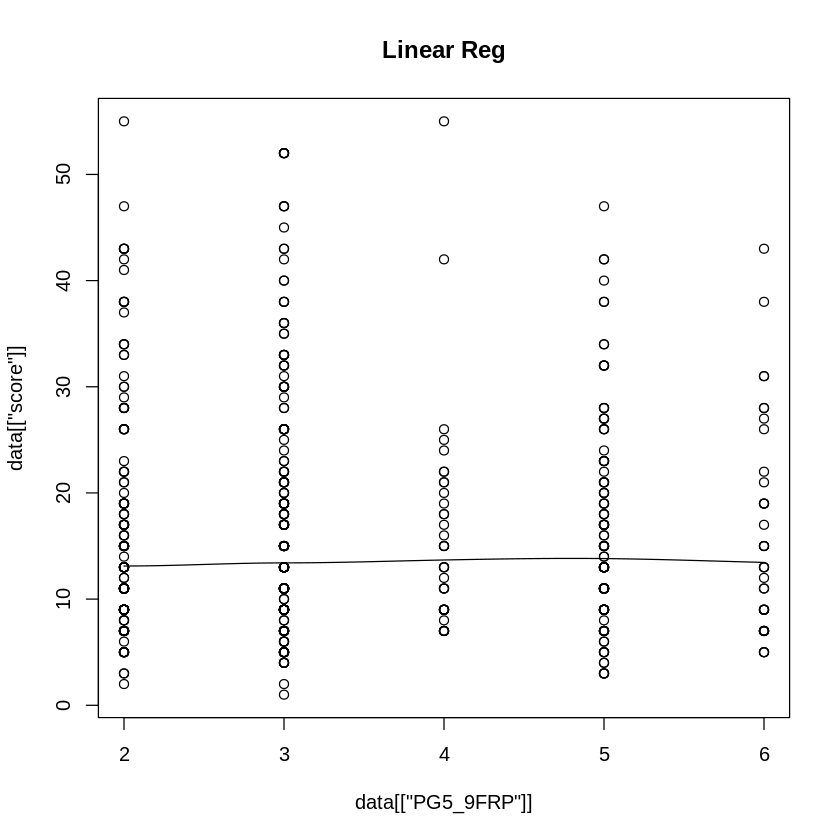

In [58]:
#Get the R^2
print("R Squared Value: ")
summary(lm(score~PG5_9FRP, data))$adj.r.squared
      
#Data Viualization section 
scatter.smooth(x=data[["PG5_9FRP"]], y=data[["score"]], main="Linear Reg")

In [ ]:
#Hypothesis 2:
#For this section, I wanted to compare whether those that prioritize R over other languagues also have a preference toward
#"Familiarity with Packages." For this figure the Y-axis is whether or not R is their prioritized language.
#Due to the heavy use of packages, there should be a trend showing more R users highly prioritizing my subject, so a downward trend
#from highest priority to lowest

#How Needed Measures are Calculated from Provided Data:
#Had no data tranformation for this section, just used whether or not the user preferred R or not as the predictor variable.

#Fitting of Statistical Model:
#When deciding on a statistical model this section, I chose a logistic regression due to the binary nature. For the X-axis
#is how higherly "Familiarity with Packages" was prioritized. The order for this is 1: No Selection, 2: Essential, 3: High Priority,
#4:Medium Priority, 5: Low Priority, and 6: No Priority. For this section, I hypothesized that those who prioritize using R are
#more likely to highly prioritize my subject due to being a package heavy language. I use whether or not the developer
#prioritizes using R or not as the predictor variable and their prioritization of my subject as the response variable.

#Interpretation of Coefficients:
#The predictor variable is whether or not the user mainly uses R and my response variable is the prioritization they place on
#my subject.

#Correlation analysis:
#As you can see in the figure, after cleaning out the data there is no significant correlation. This is just due to those not 
#prioritizing R not completing the relevant survey questions. The overwhelming number of R developers cause the data to skew
#preventing any reasonable trends to be seen. Due to the measures having no correlation, all of the measures are significant and none need
#to be dropped.

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"pseudoinverse used at 1.98"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"neighborhood radius 1.02"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"reciprocal condition number  0"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"There are other near singularities as well. 1"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"pseudoinverse used at 1.98"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"neighborhood radius 1.02"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"reciprocal condition number  0"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"There are other near singularities as well. 1"Warning message in simpleLoess(y, x, w, span, degree =

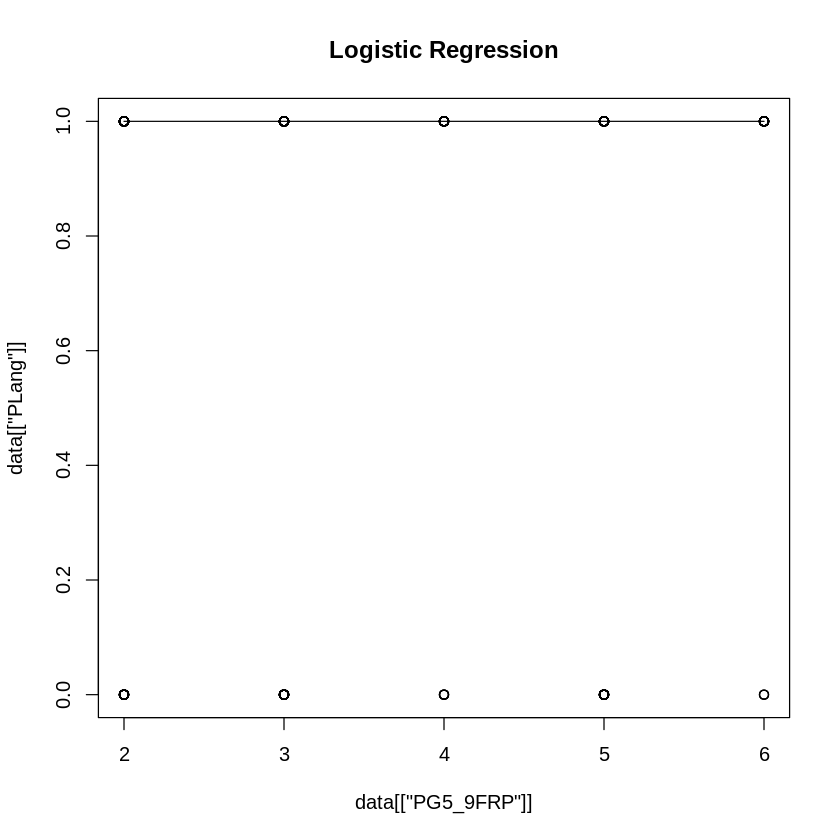

In [59]:
data$PLang<-0

LangIndex = 0
for(q in data[["PG7R"]]){
  if(q == "R"){
    data[LangIndex, "PLang"] = 1
  }
  LangIndex = LangIndex + 1
}

scatter.smooth(x=data[["PG5_9FRP"]], y=data[["PLang"]], main="Logistic Regression")

In [53]:
#Hypothesis 3:
#In this section, I am comparing whether a Data Scientist has a preference toward "Familiarity with Packages" over software
#Engineer or other choices. I hypothesized that a data scientist is more likely to prioritize "Familiarity with packages" over other
#disciplines due to their popular use of library heavy languages. For this section I have whether they are a Data Scientist 
#or not as the predictor variable and their prioritization level as the response variable. If my hypothesis is correct, those
#in the Data Science discipline should increase the curve near "2" and have a downward trend to the right.

#How Needed Measures are Calculated from Provided Data:
#Did not have any data tranformation for this section, just used whether or not the user was a Data Scientist as the predictor variable.

#Fitting of Statistical Model:
#Similar to section 2, I chose a logistic model due to the binary nature. For this figure the Y-axis is just whether or not R is a Data Scientist.
#For the x-axis is how highly they prioritize my subject. The order for this is 1: No Selection, 2: Essential, 3: High Priority,
#4:Medium Priority, 5: Low Priority, and 6: No Priority.

#Interpretation of Coefficiants:
#The predictor variable is whether or not the user is a Data Scientist and the response variabe is what prioritization they place
#on my subject.

#Correlation Analysis:
#The figure shows that the correlation amongst those who selected my subject there is not too large a significance
#other than an odd dip in the "Essential" category. There does not appear to be any trend between data scientist
#and highly prioritizing "Familiarity with Packages."Due to the measures having no correlation, all of the measures are 
#significant and none need to be dropped.

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"pseudoinverse used at 1.98"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"neighborhood radius 1.02"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"reciprocal condition number  0"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"There are other near singularities as well. 1"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"pseudoinverse used at 1.98"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"neighborhood radius 1.02"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"reciprocal condition number  0"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"There are other near singularities as well. 1"Warning message in simpleLoess(y, x, w, span, degree =

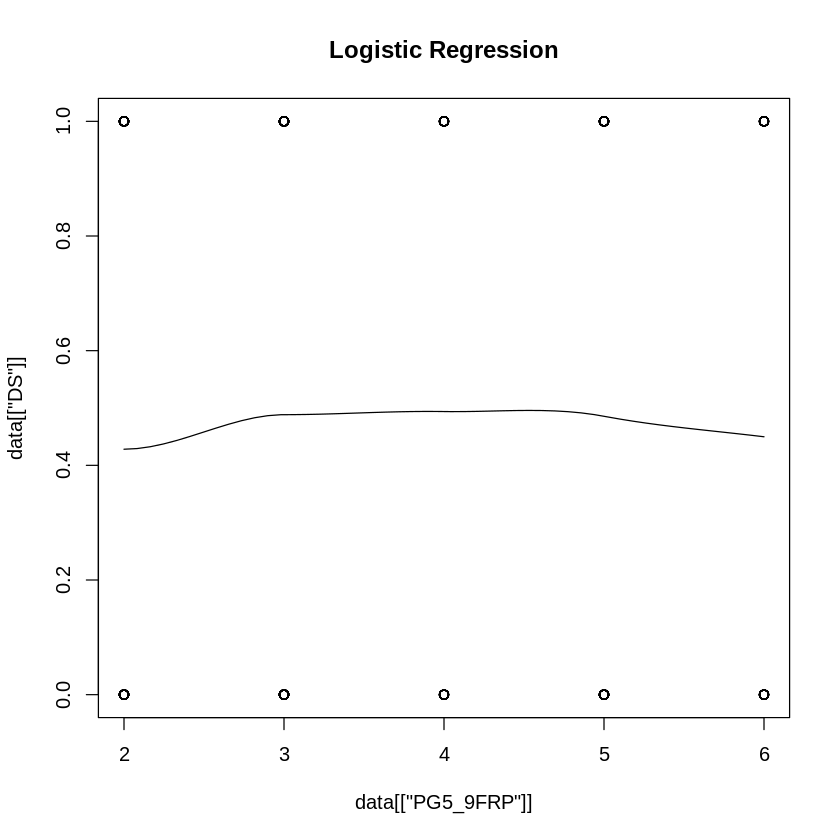

In [60]:
data$DS<-0

DSIndex = 1
for(q in data[["PG8Resp"]]){
  if(q == "Data Scientist"){
    data[DSIndex, "DS"] = 1
  }
  DSIndex = DSIndex + 1
}

scatter.smooth(x=data[["PG5_9FRP"]], y=data[["DS"]], main="Logistic Regression")

In [ ]:
#In conclusion, there does not appear to any trends between experience and the prioritization of "Familiarity with Packages."
#Similarly, the trend continue to be random when anayzing Data Science and R vs the prioritization of my subject. 
#As a result, it apppears that the prioritization of my subject comes down to the preference of the programmer rather
#than having inherent trends based off experience and background.